## NLP Components
1. Lemmatization: Lemmatization is the process of reducing words to their base or dictionary form to normalize them across different forms. 
- Example: The lemma of the word "running" is "run".

2. Token: A token is a single unit of text obtained after splitting a sentence or document based on certain criteria, such as whitespace or punctuation.
- Example: In the sentence "I love programming", the tokens are "I", "love", and "programming".

3. Stemming: Stemming is the process of reducing words to their root or base form by removing suffixes, which allows different variations of the same word to be treated as the same word.
- Example: The stem of the words "running", "runs", and "runner" is "run".

4. Stopwords: Stopwords are common words that are often filtered out during text processing because they typically do not carry significant meaning.
- Example: In English, stopwords can include words like "the", "is", "and", etc.

5. N-gram: An n-gram is a contiguous sequence of n items (words or characters) in a sentence or document.
- Example: In the sentence "The quick brown fox", examples of n-grams are unigrams ("The", "quick", "brown", "fox"), bigrams ("The quick", "quick brown", "brown fox"), and trigrams ("The quick brown", "quick brown fox").

6. TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents.
- Example: In a document containing multiple sentences, the TF-IDF score of a word is higher if it appears frequently in that document but rarely in other documents in the collection.
* $ W_{x,y} = {tf}_{x,y} * \log({N \over df_x} ) $
* tf = frequency of x in y
* df = number of documents containing x
* N = total number of documents

7. Tokenizer: A tokenizer is a tool used to break down a text into smaller units, such as words, phrases, or sentences, based on specific rules.
- Example: The NLTK library in Python provides various tokenizers, such as word tokenizers and sentence tokenizers, which can be used to tokenize text data.




In [1]:
import sklearn

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
import nltk

In [3]:
df = pd.read_csv('CNN_Articels_clean.csv')

In [4]:
df_new = df.sample(200).copy()

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tylerchun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tylerchun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
list_art = df_new['Article'].to_list()
list_cat = df_new['Category'].to_list()
list_sec = df_new['Section'].to_list()


In [70]:
df_new['Category'].unique()

array(['sport', 'news', 'entertainment', 'politics', 'business'],
      dtype=object)

In [8]:
list_art

['France wins UEFA Nations League as VAR decision leaves Spain frustrated - CNN France came from behind to defeat Spain and claim the UEFA Nations League on Sunday thanks to goals from Karim Benzema and Kylian Mbappé. football, France wins UEFA Nations League as VAR decision leaves Spain frustrated - CNN France wins UEFA Nations League as VAR decision leaves Spain frustrated  (CNN)France came from behind to defeat Spain and claim the UEFA Nations League on Sunday thanks to goals from Karim Benzema and Kylian Mbappé.The 2-1 victory at the San Siro in Milan sees France become the second country to win the Nations League as Spain\'s players were left frustrated by Mbappé\'s contentious winner.Mikel Oyarzabal had opened the scoring in the second half when he finished off Sergio Busquets\' pass, but France equalized moments later as Karim Benzema fired a wonderful, curling shot into the top corner past Unai Simón.Then with 10 minutes remaining, Mbappé got behind Spain\'s defensive line and 

In [11]:
# Define a function to preprocess the text
def preprocess_text(text):
    # Remove punctuation and other non-alphanumeric characters
    text =  re.sub('[^a-zA-Z]', ' ', text)
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    # Join the words back into a string
    return ' '.join(words)

# Preprocess the corpus
corpus = [preprocess_text(doc) for doc in list_art]
print('Corpus: \n{}'.format(corpus))

# Create a TfidfVectorizer object and fit it to the preprocessed corpus
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

# Transform the preprocessed corpus into a TF-IDF matrix
tf_idf_matrix = vectorizer.transform(corpus)

# Get list of feature names that correspond to the columns in the TF-IDF matrix
print("Feature Names:\n", vectorizer.get_feature_names_out())

# Print the resulting matrix
print("TF-IDF Matrix:\n",tf_idf_matrix.toarray().shape)

Corpus: 
['france wins uefa nations league var decision leaves spain frustrated cnn france came behind defeat spain claim uefa nations league sunday thanks goals karim benzema kylian mbapp football france wins uefa nations league var decision leaves spain frustrated cnn france wins uefa nations league var decision leaves spain frustrated cnn france came behind defeat spain claim uefa nations league sunday thanks goals karim benzema kylian mbapp victory san siro milan sees france become second country win nations league spain players left frustrated mbapp contentious winner mikel oyarzabal opened scoring second half finished sergio busquets pass france equalized moments later karim benzema fired wonderful curling shot top corner past unai sim n minutes remaining mbapp got behind spain defensive line calmly finished past sim n goal allowed stand following video assistant referee var review read neymar says fifa world cup could lastread morembapp left benzema scored france although mbapp 

In [12]:
tf_idf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
corpus

['france wins uefa nations league var decision leaves spain frustrated cnn france came behind defeat spain claim uefa nations league sunday thanks goals karim benzema kylian mbapp football france wins uefa nations league var decision leaves spain frustrated cnn france wins uefa nations league var decision leaves spain frustrated cnn france came behind defeat spain claim uefa nations league sunday thanks goals karim benzema kylian mbapp victory san siro milan sees france become second country win nations league spain players left frustrated mbapp contentious winner mikel oyarzabal opened scoring second half finished sergio busquets pass france equalized moments later karim benzema fired wonderful curling shot top corner past unai sim n minutes remaining mbapp got behind spain defensive line calmly finished past sim n goal allowed stand following video assistant referee var review read neymar says fifa world cup could lastread morembapp left benzema scored france although mbapp offside p

## word cloud

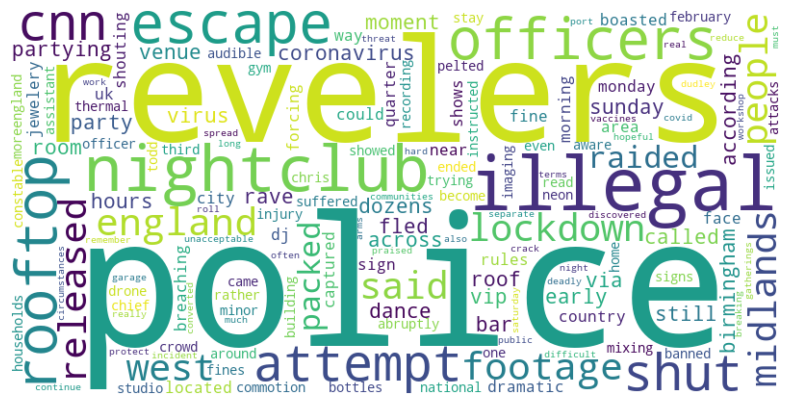

In [57]:
from nltk.probability import FreqDist
fdist = FreqDist((corpus[5].split(' ')))
from wordcloud import WordCloud
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ngram
### bigram and trigram


In [46]:
from nltk.util import ngrams

In [47]:
fdist

FreqDist({'police': 10, 'revelers': 6, 'illegal': 6, 'nightclub': 5, 'rooftop': 4, 'escape': 4, 'officers': 4, 'attempt': 3, 'shut': 3, 'cnn': 3, ...})

In [48]:
for i in fdist.keys():
    fdist[i] = str(fdist[i])
fdist

FreqDist({'revelers': '6', 'illegal': '6', 'nightclub': '5', 'rooftop': '4', 'escape': '4', 'officers': '4', 'attempt': '3', 'shut': '3', 'cnn': '3', 'england': '3', ...})

In [59]:

# Generate bigrams and trigrams
bigrams = list(ngrams((corpus[5].split(' ')), 2))
trigrams = list(ngrams((corpus[5].split(' ')), 3))



# Calculate word frequencies
fdist = FreqDist(bigrams)
fdist

FreqDist({('revelers', 'attempt'): 3, ('attempt', 'rooftop'): 3, ('rooftop', 'escape'): 3, ('escape', 'illegal'): 3, ('illegal', 'nightclub'): 3, ('nightclub', 'shut'): 3, ('shut', 'cnn'): 3, ('west', 'midlands'): 3, ('cnn', 'police'): 2, ('police', 'england'): 2, ...})

In [63]:
dict_fdist = {}
for i in dict(fdist).keys():
    dict_fdist['_'.join(i)] = fdist[i]

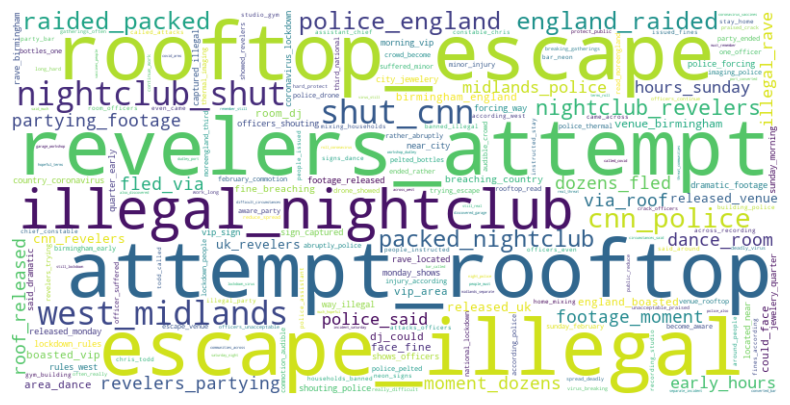

In [64]:

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_fdist)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

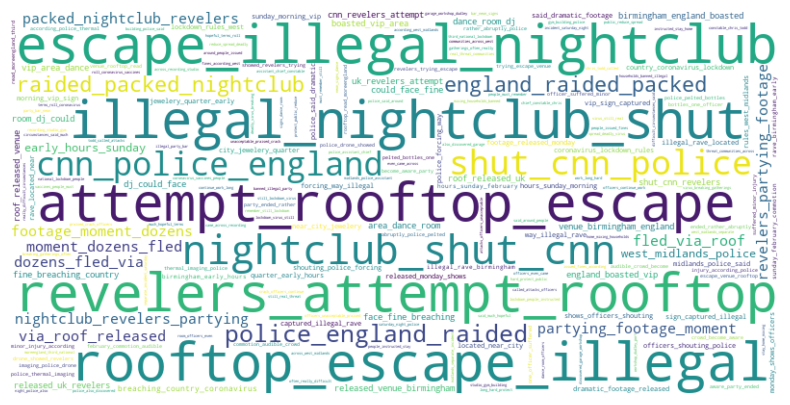

In [65]:
fdist = FreqDist(trigrams)
dict_fdist = {}
for i in dict(fdist).keys():
    dict_fdist['_'.join(i)] = fdist[i]
    
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_fdist)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
tf_idf_matrix.toarray().sum(axis=1)

array([ 9.93616382,  9.89718276, 12.51285784, 12.48697794, 10.89843425,
        9.47180301, 11.48972496,  9.69717835,  5.63858652,  9.24075253,
        9.06619768, 12.1422991 ,  9.39218772,  6.73232672,  8.20141909,
        8.91680481,  9.859221  ,  8.53514715,  8.46111567,  7.28086136,
       15.75067263,  6.41486881, 12.8989696 , 12.86699815, 11.35962256,
       14.95758703, 17.66012219,  7.34096606,  9.89065406,  9.23571785,
       10.6783444 , 10.50598968, 11.98982472, 10.56314086,  9.4229242 ,
       15.50284601,  8.2033402 , 17.92895472,  9.76821346, 10.47841374,
       10.57020755, 10.92119749,  9.60416615,  8.38932285, 12.35630281,
       10.94531185,  9.77364257,  9.98668783, 17.53065843, 15.62994269,
       11.3542911 , 11.38260537,  7.72740183,  7.87679498,  7.67430024,
       11.8210495 , 12.16897829, 11.6465501 ,  7.99217692,  9.96831503,
        9.53425886, 10.27602189,  8.64914484,  8.03970234,  7.41519705,
        9.22117282,  9.32443783,  7.74892267, 15.88356033, 11.64

In [69]:
from sklearn import linear_model

In [84]:
df_m = pd.concat([pd.DataFrame(tf_idf_matrix.toarray(),columns=['col_'+str(i) for i in range(15023)]),pd.DataFrame({'category':list_cat})],axis=1)




In [109]:
(df_m.sum(0)[:-1] <= df_m.sum(0)[:-1].quantile(0.2)).sum()

len(df_m.sum(0)[:-1])

15023

In [114]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder

In [116]:
# Initialize LabelBinarizer
OH = OneHotEncoder()

# One-hot encode the target variable
y_encoded = OH.fit_transform(df_m[['category']])

print(y_encoded)

  (0, 4)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 4)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 4)	1.0
  (10, 4)	1.0
  (11, 2)	1.0
  (12, 4)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 4)	1.0
  (18, 4)	1.0
  (19, 2)	1.0
  (20, 4)	1.0
  (21, 4)	1.0
  (22, 4)	1.0
  (23, 4)	1.0
  (24, 3)	1.0
  :	:
  (175, 4)	1.0
  (176, 4)	1.0
  (177, 2)	1.0
  (178, 4)	1.0
  (179, 2)	1.0
  (180, 2)	1.0
  (181, 0)	1.0
  (182, 2)	1.0
  (183, 2)	1.0
  (184, 4)	1.0
  (185, 4)	1.0
  (186, 2)	1.0
  (187, 2)	1.0
  (188, 4)	1.0
  (189, 2)	1.0
  (190, 4)	1.0
  (191, 2)	1.0
  (192, 4)	1.0
  (193, 1)	1.0
  (194, 4)	1.0
  (195, 2)	1.0
  (196, 2)	1.0
  (197, 2)	1.0
  (198, 4)	1.0
  (199, 4)	1.0


In [117]:
y_encoded

<200x5 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =\
    train_test_split(df_m.iloc[:,:(df_m.shape[1]-1)],df_m['category'], test_size=0.2, random_state=0,stratify=df_m['category'])

In [123]:
y_test

46              news
80              news
132             news
0              sport
45              news
50             sport
51          politics
104             news
95             sport
63             sport
24          politics
76          business
9              sport
146             news
135            sport
158             news
157            sport
195             news
107            sport
105             news
79             sport
25              news
131            sport
54             sport
99             sport
173             news
164             news
147            sport
23             sport
114            sport
149             news
87              news
53              news
43             sport
160             news
141            sport
15              news
89     entertainment
30             sport
77              news
Name: category, dtype: object

In [125]:
model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)


In [127]:
# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

In [130]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [136]:
pd.DataFrame({'cate':y_test}).groupby(['cate'])['cate'].count()

cate
business          1
entertainment     1
news             18
politics          2
sport            18
Name: cate, dtype: int64

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
print(classification_report(y_test, model.predict(x_test)))

               precision    recall  f1-score   support

     business       0.00      0.00      0.00         1
entertainment       0.00      0.00      0.00         1
         news       0.86      1.00      0.92        18
     politics       0.00      0.00      0.00         2
        sport       0.95      1.00      0.97        18

     accuracy                           0.90        40
    macro avg       0.36      0.40      0.38        40
 weighted avg       0.81      0.90      0.85        40



/Users/tylerchun/opt/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerchun/opt/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tylerchun/opt/anaconda3/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m